**Convolution**


**CONVOLUTION**

**Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel. This is related to a form of mathematical convolution. The matrix operation being performed—convolution—is not traditional matrix multiplication, despite being similarly denoted by**.


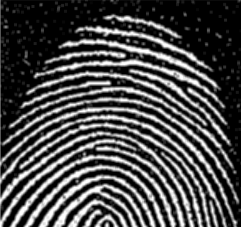

In [ ]:
from numpy.ma.core import shape
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

## convolution operation without zero padding
def convolution(img,kernal):


  r = img.shape[0] - len(kernal) +1
  c = img.shape[1] - len(kernal[0]) +1

  filtered_img=np.zeros(shape=(r,c))

  for i in range(r):
    for j in range(c):
      current = img[i:i+len(kernal),j:j+len(kernal[0])]
      mult = np.sum(current*kernal)
      filtered_img[i,j]=mult
  return filtered_img



img = cv2.imread('fingerprint.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


## kernal
kernal = np.ones((3,3), dtype=np.float32)/9
filtered_img = convolution(gray_img, kernal)
cv2_imshow(filtered_img)





**CONVOLUTION WITH ZERO PADDINGS**
 **STANDARD AVERAGE FILTERING /MEAN FILTER**
**zero padding**:

**This filter is used to remove the salt and papper noise both simultaneously
from the image**.We consider a sub image area of size m*n centered at (x,y).
We find the mean value of sub imaga area and replace the mean with central value and replace the mean value with central value.

**Zero-padding refers to the process of symmetrically adding zeroes to the input matrix. It's a commonly used modification that allows the size of the input to be adjusted to our requirement. It is mostly used in designing the CNN layers when the dimensions of the input volume need to be preserved in the output volume**.

**process of zero paddings**

1.Read the image and set the kernel

2.Get the size of image and kernel using np.shape method

3.Generate empty array of size = image + num of rows and colums pad

[s[0] +(k[0]-1)]*[s[1] + (k[1]-1)]

paste the original image at centre


**process of convolution**

1.flip the kernel

2.Slide the mask onto the image

3.Multiply the corresponding element and then add them

4.Repeat this procedure


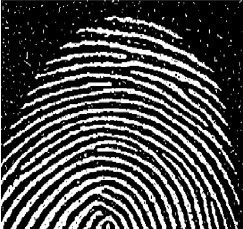

<ipython-input-28-c916309d8f72>:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z[i+np.int((k[0]-1)/2),j+np.int((k[1])/2)]=img1[i,j]


[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 255.  30. ... 172.  34.   0.]
 [  0. 255.   0. ...  80.   0.   0.]
 ...
 [  0. 255. 255. ...   0.   0.   0.]
 [  0. 255. 255. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
zero padding convolution with standard average filtering


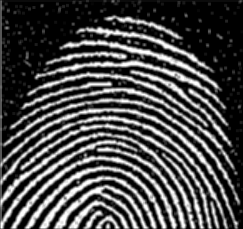

In [ ]:
from numpy.ma.core import shape
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

## convolution operation with zero padding



img = cv2.imread('fingerprint.jpg')

## binary image
img1 = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)

cv2_imshow(img)

## kernal
kernal = np.array([(1,1,1),(1,1,1),(1,1,1)])*(1/9)

s = img1.shape
k = kernal.shape

R = s[0] + k[0]-1
C = s[1] + k[1]-1
z = np.zeros((R,C))
##zero padding
for i in range(s[0]):
  for j in range(s[1]):
    z[i+np.int((k[0]-1)/2),j+np.int((k[1])/2)]=img1[i,j]

print(z)
# convolution operation
for i in range(s[0]):
  for j in range(s[1]):
    current = z[i:i+k[0],j:j+k[1]]
    mult = np.sum(current*kernal)
    img1[i,j] = mult




print("zero padding convolution with standard average filtering")
cv2_imshow(img1)





In [ ]:
## weighted average filtering



**Weighted average filtering**

**In digital image processing, we use different filters to transform or improve the image’s size, color, and other characteristics. One of them is the weighted average filter, in which pixels are multiplied by different numbers. This gives more weightage to some pixels at the expense of others. We give more weight and importance to the center value. Then, it is multiplied by a higher value than any other value in the mask. This gives this pixel a higher contribution and impact than the other pixels. It also helps us to control the blurriness of the image**.

**Line 1: We use imread() to read the image and return the image data in img_1.**

**Line 2: We store the values of the 3x3 weighted average filter in kernel**.

**Line 3: We use the zero paddings and convolution operation to multiply the kernel with the image**.

**Line 4: Lastly we use the imshow function to plot both the original and the blurred image side by side using**.


original image


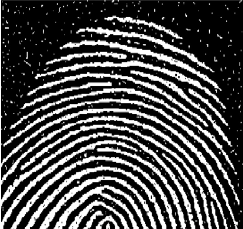

<ipython-input-30-f3f45c746b6b>:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z[i+np.int((k[0]-1)/2),j+np.int((k[1])/2)]=img1[i,j]


[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 255.  30. ... 172.  34.   0.]
 [  0. 255.   0. ...  80.   0.   0.]
 ...
 [  0. 255. 255. ...   0.   0.   0.]
 [  0. 255. 255. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
weighted average filtered image


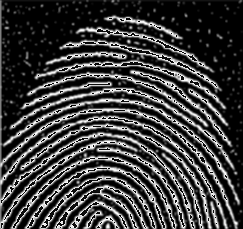

In [ ]:
from numpy.ma.core import shape
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

## convolution operation with zero padding



img = cv2.imread('fingerprint.jpg')

## binary image
img1 = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
print("original image")
cv2_imshow(img1)

## kernal
kernal = np.array([(1,2,1),(2,4,3),(1,2,1)])*(1/16)

s = img1.shape
k = kernal.shape

R = s[0] + k[0]-1
C = s[1] + k[1]-1
z = np.zeros((R,C))

for i in range(s[0]):
  for j in range(s[1]):
    z[i+np.int((k[0]-1)/2),j+np.int((k[1])/2)]=img1[i,j]

print(z)
# convolution operation
for i in range(s[0]):
  for j in range(s[1]):
    current = z[i:i+k[0],j:j+k[1]]
    mult = np.sum(current*kernal)
    img1[i,j] = mult




print("weighted average filtered image")
cv2_imshow(img1)





**The Median Filter**

**The median filter is conceptually similar to an averaging kernel**. **An averaging kernel produces an output pixel g(i,j) that is the mean intensity of a neighborhood around f(i,j)**. **The median filter is the same operation, except that instead of the mean intensity the median intensity is chosen**. **In other words, the reordering mechanism that defines this non-linear filter is a sorting operation, and the output is simply the middle value of the sorted list**.**It is used to reduce salt and papper noise**.**Also mean filter is used to remove the impulse noise**.





**How do you find the median filter in image processing?**
**Median Filter - an overview | ScienceDirect Topics
The median filtering process is accomplished by sliding a window over the image.** The filtered image is obtained by placing the median of the values in the input window, at the location of the center of that window, at the output image**. **This median is calculated by first sorting all the pixels values from the surrounding neighbourhood into a numerical orderand then replacing the pixel being considered with the middle pixel values**.



**Process of median filtering**

1.**we read the image in img1**

2.**we store the value of 3x3 filter in kernel**.

3.**Then we use zero paddings operation**.

4.**After that we use convolution operation by using for loop**.

5.**Then use np.median() function to do median filtering**


original image


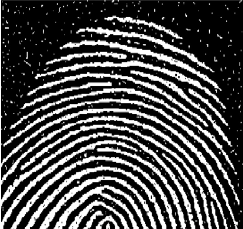

<ipython-input-1-a9295d233784>:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z[i+np.int((k[0]-1)/2),j+np.int((k[1])/2)]=img1[i,j]


[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 255.  30. ... 172.  34.   0.]
 [  0. 255.   0. ...  80.   0.   0.]
 ...
 [  0. 255. 255. ...   0.   0.   0.]
 [  0. 255. 255. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
median average filtered image


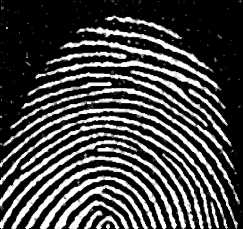

In [ ]:
from numpy.ma.core import shape
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

## convolution operation with zero padding



img = cv2.imread('fingerprint.jpg')

## binary image
img1 = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
print("original image")
cv2_imshow(img1)

## kernal
kernal = np.array([(1,1,1),(1,1,1),(1,1,1)])

s = img1.shape
k = kernal.shape

R = s[0] + k[0]-1
C = s[1] + k[1]-1
z = np.zeros((R,C))

for i in range(s[0]):
  for j in range(s[1]):
    z[i+np.int((k[0]-1)/2),j+np.int((k[1])/2)]=img1[i,j]

print(z)
# convolution operation
for i in range(s[0]):
  for j in range(s[1]):
    current = z[i:i+k[0],j:j+k[1]]
    mult = np.median(current)
    img1[i,j] = mult




print("median average filtered image")
cv2_imshow(img1)





**The maximum filter is defined as the maximum of all pixels within a local region of an image. The maximum filter is typically applied to an image to remove negative outlier noise**.**This filter reduce the papper noise because it has very low values of intensities**.**So, it can only remove papper noise**.

**PROCESS OF PERFORMING MAX FILTERING**

1.**1st we have to read the image.**

2.**Then we have to store 3x3 values in kernel**.

3.**Then we have to do zero paddings**.

4.**After that by using for loop we have to do slidings of rows and columns**.

5.**Then instead of np.median() we have to use np.max() for finding the highest pixels in the image**

6.**Then replace that value with the value of centre pixel**

original image


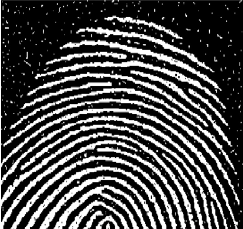

<ipython-input-2-a0aae50fb423>:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z[i+np.int((k[0]-1)/2),j+np.int((k[1])/2)]=img1[i,j]


[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 255.  30. ... 172.  34.   0.]
 [  0. 255.   0. ...  80.   0.   0.]
 ...
 [  0. 255. 255. ...   0.   0.   0.]
 [  0. 255. 255. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
max average filtered image


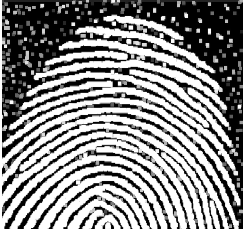

In [ ]:

## max filtering removing paper noise

from numpy.ma.core import shape
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

## convolution operation with zero padding



img = cv2.imread('fingerprint.jpg')

## binary image
img1 = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
print("original image")
cv2_imshow(img1)

## kernal
kernal = np.array([(1,1,1),(1,1,1),(1,1,1)])
##shape of image and kernal
s = img1.shape
k = kernal.shape

R = s[0] + k[0]-1
C = s[1] + k[1]-1
z = np.zeros((R,C))
## zero paddings
for i in range(s[0]):
  for j in range(s[1]):
    z[i+np.int((k[0]-1)/2),j+np.int((k[1])/2)]=img1[i,j]

print(z)
# sliding the rows and column
for i in range(s[0]):
  for j in range(s[1]):
    current = z[i:i+k[0],j:j+k[1]]
    ki = np.max(current)
    img1[i,j] = ki




print("max average filtered image")
cv2_imshow(img1)





**The minimum filter is defined as the minimum of all pixels within a local region of an image. The minimum filter is typically applied to an image to remove negative outlier noise**.**This filter is used to find the darkest point in an image**. **It uses minimum intensity value in a sub image**. **This filter remove the salt noise as result of min operation**.

**PROCESS OF PERFORMING MIN FILTERING**

1.**1st we have to read the image.**

2.**Then we have to store 3x3 values in kernel**.

3.**Then we have to do zero paddings**.

4.**After that by using for loop we have to do slidings of rows and columns**.

5.**Then instead of np.median() we have to use np.min() for finding the lowest pixels in the image**

6.**Then replace that value with the value of centre pixel**

original image


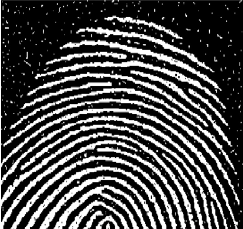

<ipython-input-3-df5bd7439004>:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z[i+np.int((k[0]-1)/2),j+np.int((k[1])/2)]=img1[i,j]


[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 255.  30. ... 172.  34.   0.]
 [  0. 255.   0. ...  80.   0.   0.]
 ...
 [  0. 255. 255. ...   0.   0.   0.]
 [  0. 255. 255. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
min average filtered image


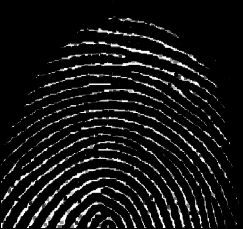

In [ ]:
from numpy.ma.core import shape
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

## convolution operation with zero padding



img = cv2.imread('fingerprint.jpg')

## binary image
img1 = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
print("original image")
cv2_imshow(img1)

## kernal
kernal = np.array([(1,1,1),(1,1,1),(1,1,1)])

s = img1.shape
k = kernal.shape

R = s[0] + k[0]-1
C = s[1] + k[1]-1
z = np.zeros((R,C))

##zero paddings
for i in range(s[0]):
  for j in range(s[1]):
    z[i+np.int((k[0]-1)/2),j+np.int((k[1])/2)]=img1[i,j]

print(z)
# convolution operation for sliding rows and columns
for i in range(s[0]):
  for j in range(s[1]):
    current = z[i:i+k[0],j:j+k[1]]
    ki = np.min(current)
    img1[i,j] = ki




print("min average filtered image")
cv2_imshow(img1)





In [ ]:
## median filtering using medianblur cv2 library function


original image


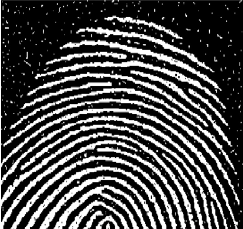

weighted average filtered image


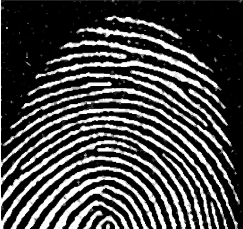

In [ ]:
from numpy.ma.core import shape
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt




img = cv2.imread('fingerprint.jpg')

## binary image
img1 = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
print("original image")
cv2_imshow(img1)

## kernal
kernal = np.array([(0,0,0),(0,0,0),(0,0,0)])

img2 = cv2.medianBlur(img1,ksize=3)






print("median average filtered image")
cv2_imshow(img2)



